In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# Uploading Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [13]:
# Find the path to the dataset
import os
os.getcwd()

'/Users/leahredon/code/AlcaRmsp/the_laundromat'

In [47]:
# create a csv path
csv_path = '/Users/leahredon/code/AlcaRmsp/the_laundromat/raw_data'
csv_path

'/Users/leahredon/code/AlcaRmsp/the_laundromat/raw_data'

In [63]:
# Uploading dataset into a dataframe 
data=pd.read_csv(os.path.join(csv_path, 'data.csv'))
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
data.shape

(6362620, 11)

In [50]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [64]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [65]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [66]:
data = data.loc[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]

In [67]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


Change type:
TRANSFER = 1
CASH_OUT = 0

In [68]:
data['type'] = data['type'].replace(['TRANSFER', 'CASH_OUT'], ['1', '0'])

In [69]:
data['type'].unique()

array(['1', '0'], dtype=object)

In [70]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.0,0.0,0.0,0.00,1
3,1,0,181.00,181.0,0.0,21182.0,0.00,1
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0


Standardize all features to be a value between 0 and 1

In [72]:
ss = StandardScaler()

data.amount         = ss.fit_transform(data[['amount']])
data.oldbalanceOrg  = ss.fit_transform(data[['oldbalanceOrg']])
data.oldbalanceDest = ss.fit_transform(data[['oldbalanceDest']])
data.newbalanceOrig = ss.fit_transform(data[['newbalanceOrig']])
data.newbalanceDest = ss.fit_transform(data[['newbalanceDest']])

In [73]:
# Separate input features (X) and target variable (y)
X = data.drop(["isFraud"],axis=1)
y = data.isFraud

Split train and test data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    
    plt.figure(figsize=(6,6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


How many class does the model predict? [0 1]
Numbers in each class:		 0 : 691587
		 1 : 1016
f1 score: 0.5947368421052632
Accuracy of this model: 0.9982212032001017


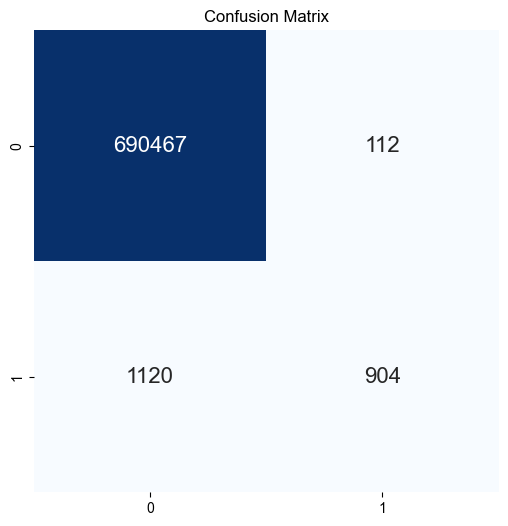

In [76]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("How many class does the model predict?",np.unique( lr_pred ))
print("Numbers in each class:\t\t","0 :",len(lr_pred[lr_pred==0]))
print("\t\t 1 :",len(lr_pred[lr_pred==1]))

f1score = f1_score(y_test, lr_pred)
print('f1 score:', f1score)

conf_matrix(y_test, lr_pred)
 
acc_lr= accuracy_score(y_test, lr_pred)
print("Accuracy of this model:", acc_lr)

Randomly duplicate the data from the minority class.

In [80]:
n = data.isFraud.value_counts()[0]

# Separate majority and minority classes
df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("The new class count are :")
df_upsampled.isFraud.value_counts()

The new class count are :


0    2762196
1    2762196
Name: isFraud, dtype: int64

In [ ]:
X = df_upsampled.drop(["isFraud"],axis = 1)
y = df_upsampled.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Predicting on the test data
up_scale_pred = lr.predict(X_test)

#Calculating and printing the f1 score 
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

#Calling function 
conf_matrix(y_test,up_scale_pred)

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of thie model:\t\t",acc_up_scale)

/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


 Randomly remove data from the majority class

In [ ]:
n = data.isFraud.value_counts()[1]

# Separate majority and minority classes

df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
print("The new class count are:")
print(df_downsampled.isFraud.value_counts())

In [ ]:
# Separate input features (X) and target variable (y)
y = df_downsampled.isFraud
X = df_downsampled.drop(['isFraud'], axis=1)
 
# Train model
lr = LogisticRegression().fit(X, y)
 
# Predict on training set
down_scale_pred = lr.predict(X)
 
print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score 
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

conf_matrix(y, down_scale_pred)
      
acc_down_scale=accuracy_score(y, down_scale_pred) 
print("Accuracy of the model:\t\t\t", acc_down_scale)

In [ ]:
Tree-Based Algorithms

In [ ]:
# Separate input features (X) and target variable (y)
y = data.isFraud
X = data.drop(['isFraud'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# Predict on training set
rfc_pred = rfc.predict(X_test)

In [ ]:
prob_y = rfc.predict_proba(X_test)
prob_y = [p[1] for p in prob_y]

print("AUROC:\t\t\t",roc_auc_score(y_test, prob_y))

f1_rfc = f1_score(y_test, rfc_pred)
print('f1 score:\t\t', f1_rfc)

conf_matrix(y_test, rfc_pred)

acc_rfc=accuracy_score(y_test, rfc_pred) 
print("Accuracy of the model:\t", acc_rfc)

In [ ]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression','RandomForest'],
        'f1 score':[f1score,f1up_scale_pred,f1down_scale_pred,f1_rfc],
        'Accuracy Score':[acc_lr,acc_up_scale,acc_down_scale,acc_rfc]}

comparision_table=pd.DataFrame(data)                               
print(comparision_table)